# Равномерное распределение — это распределение вероятностей, при котором на интервале, содержащем все возможные значения случайной величины, плотность распределения постоянна. Случайную величину считают равномерно распределённой на отрезке [a, b], если её плотность распределения
- 0, если x ≤ a; 2
- 1/(b-a), если a < x ≤ b; 2
- 0, если x > b. 2:

# Биномиальное распределение — это дискретное распределение вероятностей, моделирующее количество успехов (k) в последовательности из n независимых испытаний Бернулли, каждое из которых имеет два возможных исхода: успех (с вероятностью p) и неудача (с вероятность q = 1 - p)
### $P(X - k)=C(n,k)p^k(1-p)^{n-k}$



# Нормальное распределение, также известное как распределение Гаусса, — это одно из самых важных и широко используемых распределений в теории вероятностей и статистике. Плотность распредления: $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

# Экспоненциальное распределение — это непрерывное распределение вероятностей, которое часто используется для моделирования времени между событиями в процессе Пуассона. Плотность распределения: 
$
\begin{equation}
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, x > 0 \\
0, x < 0
\end{cases}
\end{equation}
$

# Пуассоновское распределение — это дискретное распределение вероятностей, которое моделирует количество событий, происходящих за фиксированный интервал времени или в фиксированной области пространства. Функция вероятности: $P(X=k)=\frac{\lambda^k e^{-\lambda}}{k!}$

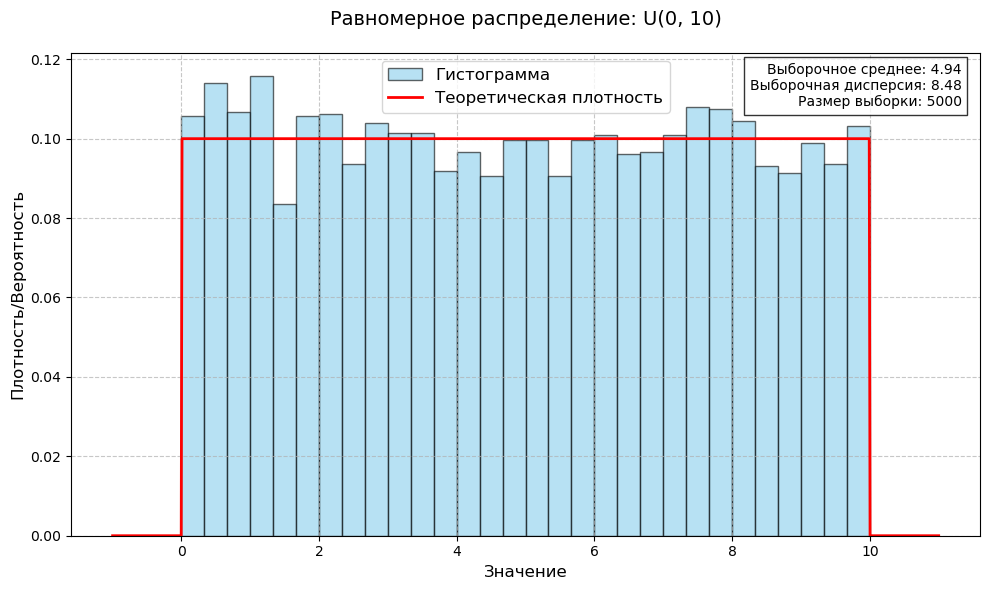

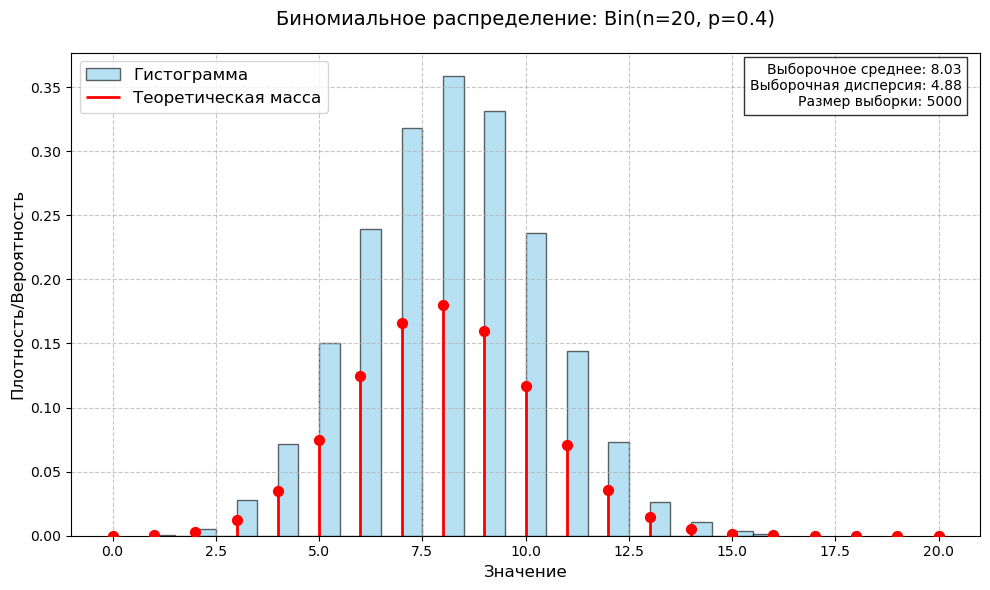

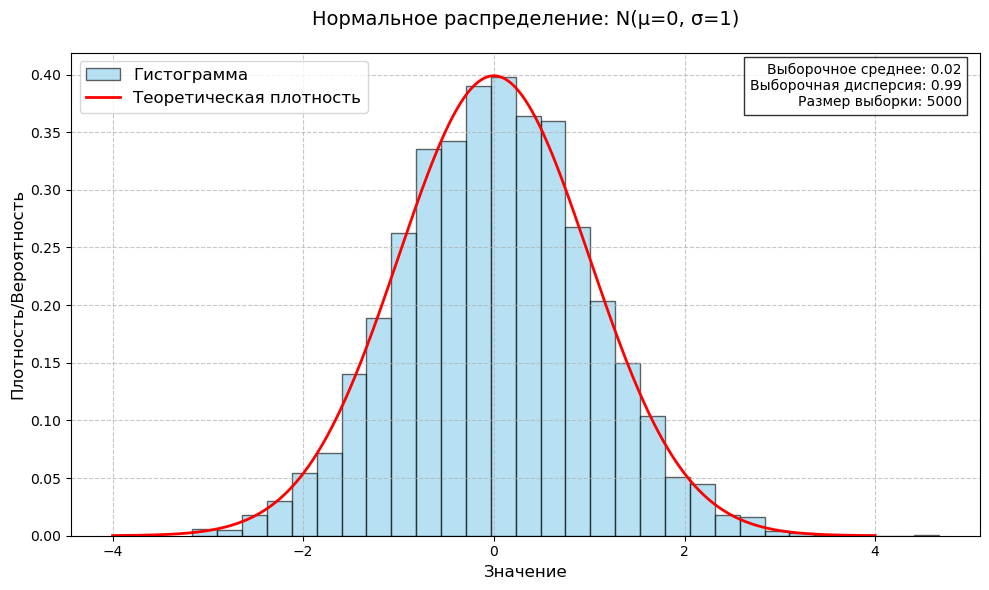

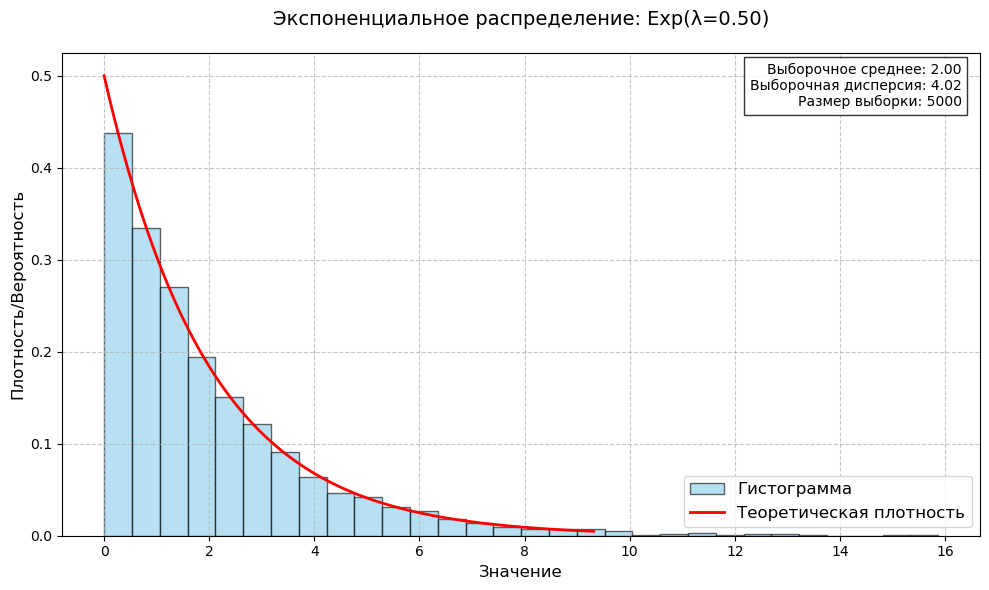

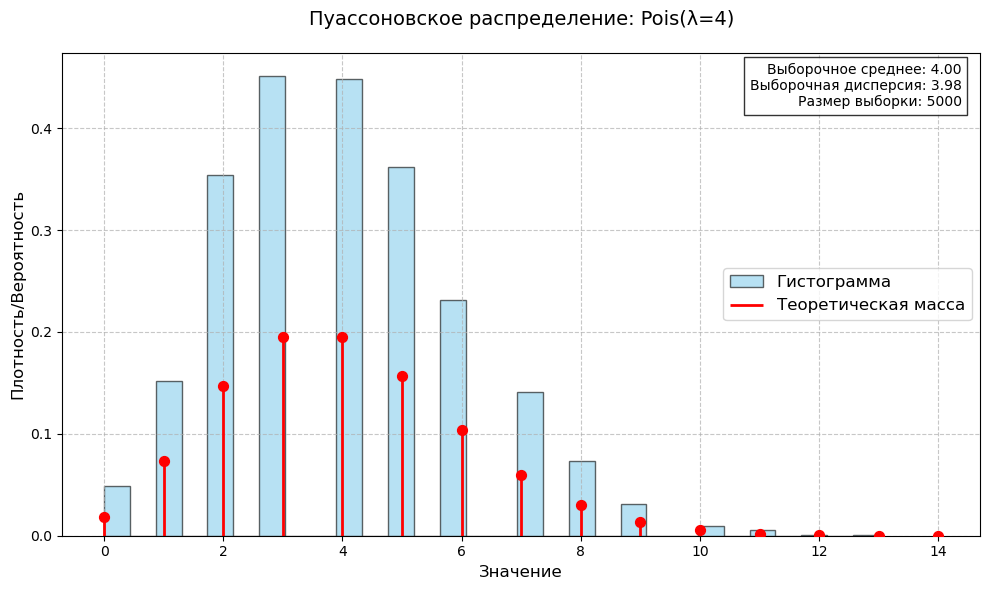

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from typing import Dict, Any

def plot_distribution(distribution: str, params: Dict[str, Any], size: int = 1000) -> None:
    """
    Визуализирует распределение с гистограммой и теоретической плотностью/массой
    
    Параметры:
    distribution - название распределения
    params - параметры распределения
    size - размер выборки
    """
    plt.figure(figsize=(10, 6))
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Генерация данных
    if distribution == "равномерное":
        data = np.random.uniform(params["low"], params["high"], size)
        x = np.linspace(params["low"] - 1, params["high"] + 1, 1000)
        pdf = stats.uniform.pdf(x, loc=params["low"], 
                              scale=params["high"]-params["low"])
        title = f'Равномерное распределение: U({params["low"]}, {params["high"]})'
        
    elif distribution == "биномиальное":
        data = np.random.binomial(params["n"], params["p"], size)
        x = np.arange(0, params["n"] + 1)
        pdf = stats.binom.pmf(x, params["n"], params["p"])
        title = f'Биномиальное распределение: Bin(n={params["n"]}, p={params["p"]})'
        
    elif distribution == "нормальное":
        data = np.random.normal(params["mu"], params["sigma"], size)
        x = np.linspace(params["mu"] - 4*params["sigma"], 
                        params["mu"] + 4*params["sigma"], 1000)
        pdf = stats.norm.pdf(x, params["mu"], params["sigma"])
        title = f'Нормальное распределение: N(μ={params["mu"]}, σ={params["sigma"]})'
        
    elif distribution == "экспоненциальное":
        data = np.random.exponential(params["scale"], size)
        x = np.linspace(0, np.quantile(data, 0.99), 1000)
        pdf = stats.expon.pdf(x, scale=params["scale"])
        title = f'Экспоненциальное распределение: Exp(λ={1/params["scale"]:.2f})'
        
    elif distribution == "пуассоновское":
        data = np.random.poisson(params["lambda"], size)
        x = np.arange(0, np.max(data) + 2)
        pdf = stats.poisson.pmf(x, params["lambda"])
        title = f'Пуассоновское распределение: Pois(λ={params["lambda"]})'
    
    else:
        raise ValueError(f"Неизвестное распределение: {distribution}")

    # Визуализация
    plt.hist(data, bins=30, density=True, alpha=0.6, 
             color='skyblue', edgecolor='black', label='Гистограмма')
    
    if distribution in ["биномиальное", "пуассоновское"]:
        plt.vlines(x, 0, pdf, colors='red', lw=2, label='Теоретическая масса')
        plt.scatter(x, pdf, color='red', s=50, zorder=3)
    else:
        plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая плотность')
    
    # Добавляем статистики
    stats_text = (f"Выборочное среднее: {np.mean(data):.2f}\n"
                 f"Выборочная дисперсия: {np.var(data):.2f}\n"
                 f"Размер выборки: {size}")
    
    plt.text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
             ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Значение', fontsize=12)
    plt.ylabel('Плотность/Вероятность', fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Параметры распределений
params_list = {
    "равномерное": {"low": 0, "high": 10},
    "биномиальное": {"n": 20, "p": 0.4},
    "нормальное": {"mu": 0, "sigma": 1},
    "экспоненциальное": {"scale": 2},
    "пуассоновское": {"lambda": 4}
}

# Визуализация всех распределений
for dist, params in params_list.items():
    plot_distribution(dist, params, size=5000)